# Modulopgave statistik
## Opgaven er delt i to dele. Del 1 og Del 2
### Til at besvare modulopgaven, skal I bruge to datasæts ”Investering i værdipapirer nyeste” og ”Google Play Apps”.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from scipy.stats import norm

# Del 1
Her skal I bruge datasættet ”Investering i værdipapirer nyeste”, som I har besvaret i starten af denne
semester. Antag at undersøgelsen handler om investeringsadfærd blandt de danske studerende.

In [19]:
dfInvest = pd.read_excel("./Kopi af Investering i værdipapirer nyeste.xlsx")

## 1) Lav en passende figur til at illustrere andelen af respondenter, som ejer værdipapirer.

In [20]:
dfInvest

,Hvad er din alder?,Angiv din adgangsgivende eksamen til din nuværende uddannelse,"Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?",Hvad er værdien af din portefølje i kr.?,Hvorfor investerer du ikke i værdipapirer?,E-mail,Samlet status - Ny,Samlet status - Distribueret,Samlet status - Nogen svar,Samlet status - Gennemført,Samlet status - Frafaldet
0,20 - 21,STX (Almen studentereksamen),Nej,NaN,Har ikke råd,NaN,0,0,0,1,0
1,22 - 23,HHX,Ja,10.001 kr eller mere,NaN,NaN,0,0,0,1,0
2,22 - 23,HHX,Ja,1001 - 5000 kr.,NaN,NaN,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
4,22 - 23,HHX,Ja,10.001 kr eller mere,NaN,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
285,24 eller mere,HF,Ja,10.001 kr eller mere,NaN,NaN,0,0,0,1,0
286,18 - 19,Andet,Nej,NaN,Risiko er for høj,NaN,0,0,0,1,0
287,22 - 23,STX (Almen studentereksamen),Ja,10.001 kr eller mere,NaN,NaN,0,0,0,1,0
288,24 eller mere,HF,Ja,10.001 kr eller mere,NaN,NaN,0,0,0,1,0


In [21]:
dfInvest.columns

Index(['Hvad er din alder?',
       'Angiv din adgangsgivende eksamen til din nuværende uddannelse',
       'Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?',
       'Hvad er værdien af din portefølje i kr.?',
       'Hvorfor investerer du ikke i værdipapirer?', 'E-mail',
       'Samlet status - Ny', 'Samlet status - Distribueret',
       'Samlet status - Nogen svar', 'Samlet status - Gennemført',
       'Samlet status - Frafaldet'],
      dtype='object')

In [22]:
dfInvest = dfInvest[['Hvad er din alder?',
       'Angiv din adgangsgivende eksamen til din nuværende uddannelse',
       'Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?',
       'Hvad er værdien af din portefølje i kr.?',
       'Hvorfor investerer du ikke i værdipapirer?']]

In [23]:
dfInvest = dfInvest.rename(columns={'Hvad er din alder?':'alder',
       'Angiv din adgangsgivende eksamen til din nuværende uddannelse':'uddannelse',
       'Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?':'ejer_værdipapirer',
       'Hvad er værdien af din portefølje i kr.?':'værdi',
   })

In [31]:
dfInvest['ejer_værdipapirer'].count()

259

In [42]:
dfInvest['ejer_værdipapirer']=="Nej".query(inplace=True)

AttributeError: 'str' object has no attribute 'query'

In [73]:
dfInvest['værdi'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       NaN
1      10.001 kr eller mere
2          1001 - 5000 kr. 
3                       NaN
4      10.001 kr eller mere
               ...         
285    10.001 kr eller mere
286                     NaN
287    10.001 kr eller mere
288    10.001 kr eller mere
289    10.001 kr eller mere
Name: værdi, Length: 290, dtype: object>

In [45]:
val = dfInvest['ejer_værdipapirer'].value_counts()/dfInvest['ejer_værdipapirer'].count()

In [46]:
for x in val:
    value=str('%.2f' % (x*100))+'%' #Change the value to .00 desimals and multiply by 100 and add a % and make it a string
    print(value)

53.28%
46.72%


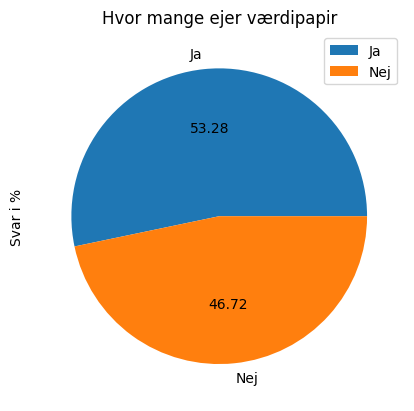

In [48]:
ax = (dfInvest['ejer_værdipapirer'].value_counts()\
    /dfInvest['ejer_værdipapirer'].count())\
    .plot(kind='pie', title='Hvor mange ejer værdipapir', autopct='%.2f')
ax.set_ylabel('Svar i %')
ax.legend()
ax.plot()
plot.show()

## 2) Beregn et 95% konfidensinterval for andelen af studerende, som investerer i værdipapirer.

## 3) Test på 5% signifikansniveau om at mindst halvdelen af de danske studerende ejer værdipapirer.

## 4) Lav en passende figur, som viser hvordan andelen af respondenter, som investerer i værdipairer,fordeler sig ift. uddannelsestyper. Ud fra figuren: hvem har den største tendens til at investere i værdipapirer, hvem har den mindste tendens?

## 5) Test på 5% signifikansniveau om andelen, der investerer i værdipapirer er signifikant større blandt studerende med HHX baggrund for studerende med STX baggrund.

# Del 2
Her skal I bruge datasættet ”Google Play Apps”.

In [10]:
#dfApps = pd.read_excel("./Kopi af Google Play Apps.xls")

## 1) En af variable i datasættet er ratings, som viser brugernes rating fra 1 til 5 for de enkelte apps.
Beregn 95% KI for rating for alle Google Play Apps.

## 2) Hvilken kategori apps har i den højeste gennemsnitlige rating og hvilken kategori apps har den
laveste gennemsnitlige rating? (brug variabel category til at gruppere i Excel)


## 3) Undersøg hvad er den gennemsnitlige rating for betalings apps ift. gratis apps. Test på 5%
signifikansniveau om forskellen er statistisk signifikant.


## 4) Test på 5% signifikansniveau om den gennemsnitlige pris for apps på Google Play er mindre end 5$.